<a href="https://colab.research.google.com/github/leenago/Self_studying/blob/master/hongong_ML/%ED%98%BC%EC%9E%90_%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%2B_%EB%94%A5%EB%9F%AC%EB%8B%9D_3_1_k_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-최근접 이웃 회귀


## 1. 데이터 준비
- 지도 학습 알고리즘은 크게 **분류**와 **회귀**로 나뉜다.
   - 회귀는 임의의 어떤 숫자를 예측하는 문제이며, 두 변수 사이의 상관관계를 분석하는 방법이다.
   - ex) 내년도 경제 성장률 예측, 배달 도착 시간 예측

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

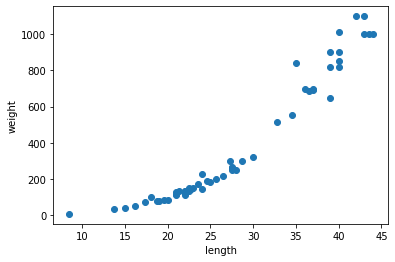

In [3]:
#데이터가 어떤 모양을 띠고 있는지 산점도로 확인
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 위 산점도를 통해, 농어의 길이가 길어질수록 농어의 무게도 늘어나는 것을 알 수 있다.
---
- train set과 test set으로 데이터를 나눠주자.
  - **input data(입력 데이터)**: 모델이 규칙을 찾아야 할 대상
  - **target data(타깃 데이터)**: 모델이 맞춰야 할 정답

In [4]:
from sklearn.model_selection import train_test_split

# 농어의 길이를 통해 무게를 예측하는 작업이기 때문에, 데이터가 1차원 배열이다.
#train_test_split(X,y)
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [5]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [6]:
test_input

array([ 8.4, 18. , 27.5, 21.3, 22.5, 40. , 30. , 24.6, 39. , 21. , 43.5,
       16.2, 28. , 27.3])

- 1차원 배열을 2차원으로 변경해야 하므로, **reshape()** 메서드를 사용해준다.

In [7]:
print(train_input.shape, test_input.shape)

(42,) (14,)


- 위 데이터들을 2차원 배열로 바꿔주자.
- **reshape(-1,1)**을 해주면, '첫 번째 크기를 전체 원소로 채워주고, 두 번째 크기를 1로 채우라는 의미'이다.
- 원본 배열의 원소가 배열을 하려는 수와 같아야 한다.

In [8]:
a = np.array([1,2,3,4,5,6])
a.reshape(-1,1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [9]:
a.reshape(3,2)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [10]:
a.reshape(-1,3)

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
# train_input, test_input을 2차원 배열로 만들어주기
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1, 1)
print(train_input, test_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]] [[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


## 2. 결정계수(R²)
- k-최근접 이웃 회귀 알고리즘을 구현한 클래스는 KNeighborsRegressor이다.
- 회귀에서는 정확한 숫자를 맞힐 수가 없기 때문에(예측값이나 타깃 모두 임의의 수치이기 때문), 결정계수(coefficient of determination)을 이용하여 평가를 한다.
---

* R² = 1- {(타깃 - 예측값)²/ (타깃 - 타깃평균)²}
- 회귀문제에서, KNeighborsRegressor 클래스의 score() 메서드는 결정계수인 R²값을 반환한다!


In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
knr = KNeighborsRegressor() #기본 neighbors는 5
knr.fit(train_input, train_target) #훈련 데이터의 입력데이터와, 훈련 데이터의 타깃 데이터를 활용하여 규칙을 찾는다.

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [14]:
#테스트 데이터의 입력데이터와, 테스트 데이터의 타깃 데이터를 활용하여 얼마나 정답을 맞췄는지 확인한다.
print(knr.score(test_input, test_target))

0.9928094061010639


- 타깃과 예측한 값 사이의 차이를 구해보면, 어느 정도 예측이 벗어났는지 가늠할 수 있다.
- **mean_absolute_error**는 타깃과 예측의 절댓값 오차를 평균하여 반환한다.

In [15]:
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측 만들기
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

- 여기서, 예측이 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있다.

## 3. 과대적합 vs 과소적합
- 과대적합(overfitting): 테스트 세트보다 훈련 세트의 점수가 높은 경우
  - 훈련 세트에만 잘 맞는 모델이라, 새로운 샘플에 대한 예측 시 잘 맞지 않음

- 과소적합(underfitting): 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수 모두 낮은 경우
  - 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우
  - 훈련 세트와 테스트 세트의 크기가 매우 작으면 발생하기도 한다.

In [16]:
print(knr.score(test_input, test_target), knr.score(train_input, train_target))
#훈련 세트보다 테스트 세트의 점수가 높게 나왔으므로, 과소적합이 일어났다고 볼 수 있다.

0.9928094061010639 0.9698823289099255


- 훈련 세트보다 테스트 세트의 점수가 높게 나왔으므로, 과소적합이 일어났다고 볼 수 있다.
- 이를 해결하기 위해서는, 훈련 세트에 더 잘 맞게 모델을 만들면 된다. 
---
- k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만들기 위해서는, *이웃의 개수를 줄이면* 된다.

In [17]:
knr.n_neighbors = 3

In [18]:
#이웃의 개수를 3으로 줄이고, 모델을 다시 훈련시켜본다.

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target), knr.score(test_input, test_target))

0.9804899950518966 0.974645996398761


- 테스트 세트의 점수가 훈련세트보다 낮아졌고, 두 점수의 차이가 크지 않으므로 과대적합 문제가 해결되었다.